In [1]:
import torch
import numpy as np
from torch import nn
import random
import torch.nn.functional as F
import collections
from torch.optim.lr_scheduler import StepLR
# from CommunicationP3DX import CommunicationP3DX
# from Agent import AgentClass
# from std_srvs.srv import Empty
# import rospy
import time
import shelve
import os
import gc
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
# with open('mean_min_mode_25k_results_dfs.pickle', 'rb') as handle:
#     results_dfs = pickle.load(handle)

def get_complete_hist_from_shelve(workspace_folder_path, goal_index,agg_method, n_sectors):
  with open(workspace_folder_path+'/tstres_goal_{goal}{metodo}_{n_setores}.pickle'.format(
        goal=goal_index
        ,metodo = agg_method
        ,n_setores = n_sectors), 'rb') as handle:
    hist_dict = pickle.load(handle)

    return hist_dict

# workspace_folder_path = 'E:/sia_23/25k'
load_path = '/media/nero-ia/7A309A87309A49D1/sia_23/25k/tests'#'drive/MyDrive/DSRM_DDQN/qn_tests_1000repeats'

# hist = get_complete_hist_from_shelve(load_path, goal_index = 2, agg_method='mean', n_sectors='4')

In [2]:
# def calc_vec_tdt(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
#   tdt_ep = []
#   pos =qn_test_results_dict[env_and_method]['pos']

#   # Extract position from each episode and sum tdt
#   for ep in range(1,len(pos)+1):
#     tdt = 0
#     for n_iter in range(0, len(pos[ep])):
#       # last position:
#       x0 =pos[ep][n_iter-1][0]
#       y0 =pos[ep][n_iter-1][1]


#       # current position:
#       y1 =pos[ep][n_iter][1]
#       x1 =pos[ep][n_iter][0]

#       # distance traveled
#       tdt = np.sqrt((x1-x0)**2 +(y1-y0)**2 ) + tdt

#     # concatenate tdt for each episode
#     tdt_ep.append(tdt)

#   return tdt_ep

# def calc_vec_fdtg(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
#   current_goal = int(env_and_method.split('_')[1][0])
#   goal = {0:[-8,8],
#               1:[-2,8],
#               2:[8,-3],
#               3:[-8,-8],
#               4:[8,8]}[current_goal]

#   fdtg_ep = []
#   pos = qn_test_results_dict[env_and_method]['pos']

#   # Extract position from each episode and append fdtg
#   for ep in range(1,len(pos)+1):
#     xf = pos[ep][len(pos[ep])-1][0]
#     yf = pos[ep][len(pos[ep])-1][1]

#     fdtg_ep.append(np.sqrt((xf-goal[0])**2 +(yf-goal[1])**2 ))

#   return fdtg_ep

# def calc_vec_mdto(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):

#   mdto_ep = []
#   scans = qn_test_results_dict[env_and_method]['scan']

#   # Extract min of scan from each episode and append over iterations
#   for ep in range(1,len(scans)+1):
#     min_dto = []
#     for n_iter in range(0, len(scans[ep])):
#       min_dto.append(np.min(scans[ep][n_iter]))

#     mdto_ep.append(np.mean(min_dto)) # append mean value of min_dto

#   return mdto_ep


# # 0 for crash, 1 for goal 2 for time
# def get_success_df(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
#   hist_dict = qn_test_results_dict[env_and_method]
#   success = []
#   episodes = []
#   for ep in hist_dict['epresult'].keys():
#       episodes.append(ep)
#       if len(hist_dict['epresult'][ep])<=2:
#         res =hist_dict['epresult'][ep][1]
#       else:
#         res = hist_dict['epresult'][ep][-1][1]

#       success.append(res)
#   df = pd.DataFrame({'Episodes':episodes, 'Success'+env_and_method:success})
#   df['Success'+env_and_method] = np.where(df['Success'+env_and_method]==1,1,0)
#   return df

# def get_collision_df(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
#   hist_dict = qn_test_results_dict[env_and_method]
#   collision = []
#   episodes = []
#   for ep in hist_dict['epresult'].keys():
#       episodes.append(ep)
#       if len(hist_dict['epresult'][ep])<=2:
#         res =hist_dict['epresult'][ep][1]
#       else:
#         res = hist_dict['epresult'][ep][-1][1]

#       collision.append(res)

#   df = pd.DataFrame({'Episodes':episodes, 'Collision'+env_and_method:collision})
#   df['Collision'+env_and_method] = np.where(df['Collision'+env_and_method]==0,1,0)
#   return df

In [3]:
# dict_testresult_per_dsrm = {}

# from tqdm.notebook import tqdm
# for dsrm in tqdm([['mean','4']
#     ,['mean','5']
#     ,['mean','6']
#     ,['mean','10']
#     ,['min','4']
#     ,['min','5']
#     ,['min','6']
#     ,['min','10']
#     ,['mode','4']
#     ,['mode','5']
#     ,['mode','6']
#     ,['mode','10']]):


#     for goal in range(0,5):
#       dict_key = 'goal_{goal}{metodo}_{n_setores}'.format(
#         goal=goal
#         ,metodo = dsrm[0]
#         ,n_setores = dsrm[1])

#       current_hist_dict = get_complete_hist_from_shelve(load_path
#                                                         , goal_index = goal
#                                                         , agg_method=dsrm[0]
#                                                         , n_sectors=dsrm[1])
#       dict_testresult_per_dsrm[dict_key] = current_hist_dict

#       del current_hist_dict

#       gc.collect()

# save_path = '/media/nero-ia/7A309A87309A49D1/sia_23/25k/tests/' #'drive/MyDrive/DSRM_DDQN/result_pickles/'
# with open(save_path+'qn_test_dict_1000samples.pickle', 'wb') as handle:
#     pickle.dump(dict_testresult_per_dsrm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
def calc_vec_tdt(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
  tdt_ep = []
  pos =qn_test_results_dict['pos']

  # Extract position from each episode and sum tdt
  for ep in range(1,len(pos)+1):
    tdt = 0
    for n_iter in range(0, len(pos[ep])):
      # last position:
      x0 =pos[ep][n_iter-1][0]
      y0 =pos[ep][n_iter-1][1]


      # current position:
      y1 =pos[ep][n_iter][1]
      x1 =pos[ep][n_iter][0]

      # distance traveled
      tdt = np.sqrt((x1-x0)**2 +(y1-y0)**2 ) + tdt

    # concatenate tdt for each episode
    tdt_ep.append(tdt)

  return tdt_ep

def calc_vec_fdtg(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
  current_goal = int(env_and_method.split('_')[1][0])
  goal = {0:[-8,8],
              1:[-2,8],
              2:[8,-3],
              3:[-8,-8],
              4:[8,8]}[current_goal]

  fdtg_ep = []
  pos = qn_test_results_dict['pos']

  # Extract position from each episode and append fdtg
  for ep in range(1,len(pos)+1):
    xf = pos[ep][-1][0]
    yf = pos[ep][-1][1]

    # fdtg_ep.append(np.sqrt((xf-goal[0])**2 +(yf-goal[1])**2 ))
    fdtg_ep.append(np.linalg.norm(np.array((xf,yf))-np.array((goal[0],goal[1]))))

  return fdtg_ep

def calc_vec_mdto(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):

  mdto_ep = []
  scans = qn_test_results_dict['scan']

  # Extract min of scan from each episode and append over iterations
  for ep in range(1,len(scans)+1):
    min_dto = []
    for n_iter in range(0, len(scans[ep])):
      min_dto.append(np.min(scans[ep][n_iter]))

    mdto_ep.append(np.mean(min_dto)) # append mean value of min_dto

  return mdto_ep


# 0 for crash, 1 for goal 2 for time
def get_success_df(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
  hist_dict = qn_test_results_dict
  success = []
  episodes = []
  for ep in hist_dict['epresult'].keys():
      episodes.append(ep)
      if len(hist_dict['epresult'][ep])<=2:
        res =hist_dict['epresult'][ep][1]
      else:
        res = hist_dict['epresult'][ep][-1][1]

      success.append(res)
  df = pd.DataFrame({'Episodes':episodes, 'Success'+env_and_method:success})
  df['Success'+env_and_method] = np.where(df['Success'+env_and_method]==1,1,0)
  return df

def get_collision_df(qn_test_results_dict, env_and_method:str = 'goal_0mean_4'):
  hist_dict = qn_test_results_dict
  collision = []
  episodes = []
  for ep in hist_dict['epresult'].keys():
      episodes.append(ep)
      if len(hist_dict['epresult'][ep])<=2:
        res =hist_dict['epresult'][ep][1]
      else:
        res = hist_dict['epresult'][ep][-1][1]

      collision.append(res)

  df = pd.DataFrame({'Episodes':episodes, 'Collision'+env_and_method:collision})
  df['Collision'+env_and_method] = np.where(df['Collision'+env_and_method]==0,1,0)
  return df

In [5]:
qn_test_metrics = {}
from tqdm.notebook import tqdm
for dsrm in tqdm([['mean','4']
    ,['mean','5']
    ,['mean','6']
    ,['mean','10']
    ,['min','4']
    ,['min','5']
    ,['min','6']
    ,['min','10']
    ,['mode','4']
    ,['mode','5']
    ,['mode','6']
    ,['mode','10']]):


    for goal in range(0,5):
      dict_key = 'goal_{goal}{metodo}_{n_setores}'.format(
        goal=goal
        ,metodo = dsrm[0]
        ,n_setores = dsrm[1])

      current_hist_dict = get_complete_hist_from_shelve(load_path
                                                        , goal_index = goal
                                                        , agg_method=dsrm[0]
                                                        , n_sectors=dsrm[1])

      qn_test_metrics[dict_key] = {
              'tdt'  : calc_vec_tdt(current_hist_dict),
              'fdtg' : calc_vec_fdtg(current_hist_dict),
              'mdto' : calc_vec_mdto(current_hist_dict),
              'sr_df': get_success_df(current_hist_dict),
              'cr_df': get_collision_df(current_hist_dict)
          }

      del current_hist_dict

      gc.collect()

  0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
save_path = '/media/nero-ia/7A309A87309A49D1/sia_23/25k/tests/' #'drive/MyDrive/DSRM_DDQN/result_pickles/'
with open(save_path+'qn_test_metrics_1000samples.pickle', 'wb') as handle:
    pickle.dump(qn_test_metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
def get_metric_df(qn_test_metrics, metric):
    df = pd.DataFrame({})
    for env_and_method in qn_test_metrics.keys():
        if env_and_method.startswith(goal):
            sampling = env_and_method.split('_')[1][1:]
            n_sectors = env_and_method.split('_')[2]
            if metric.endswith('df'):
                df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values
            else:
                df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric]
    return df

UnboundLocalError: local variable 'boxprops' referenced before assignment

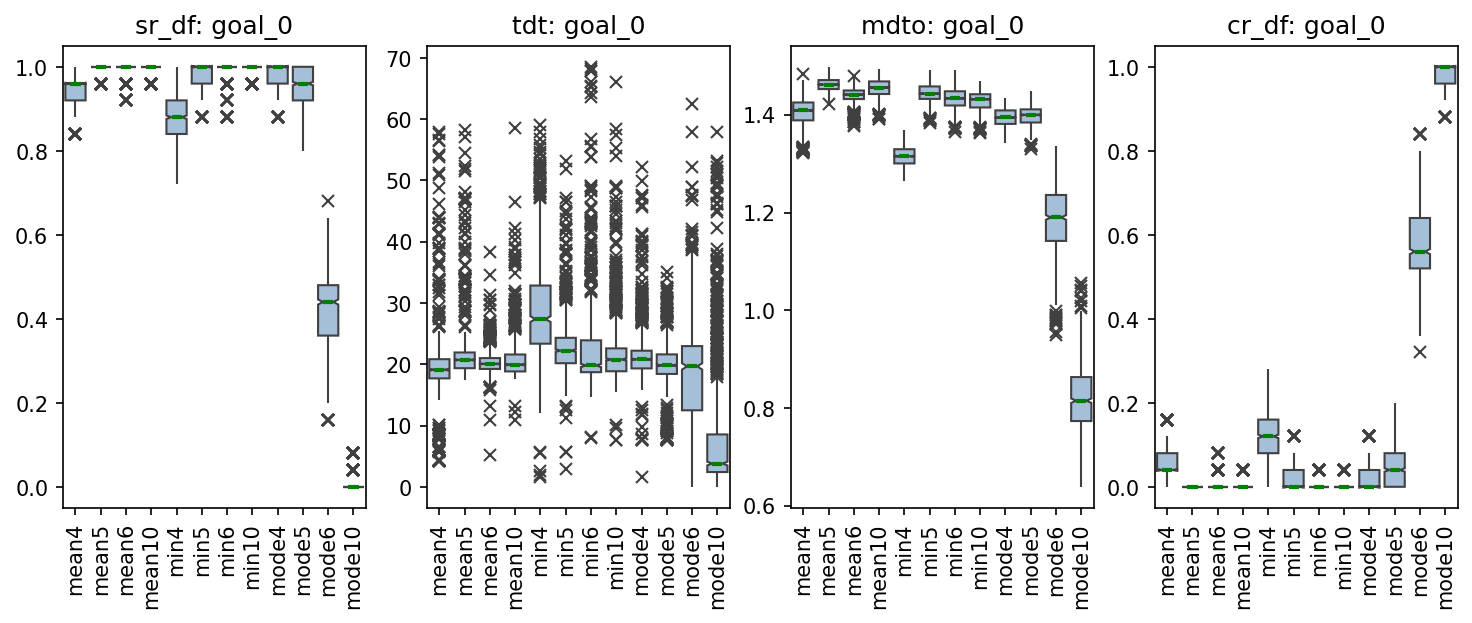

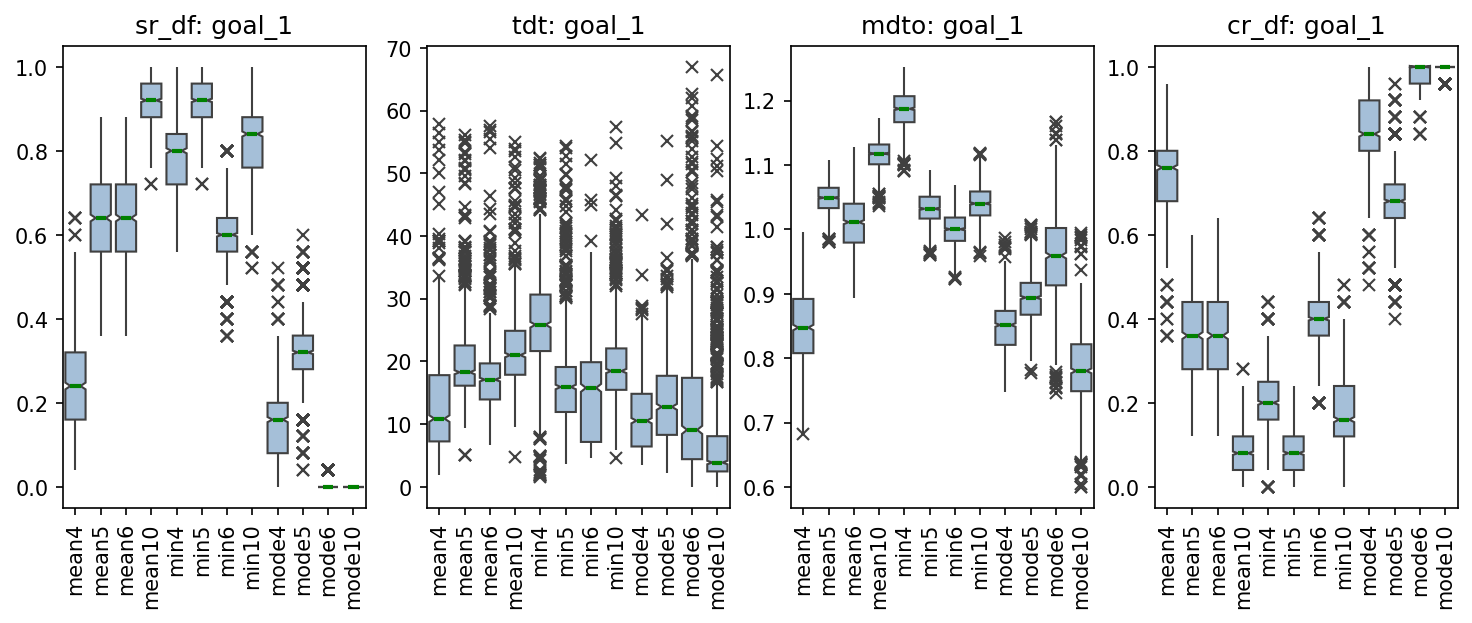

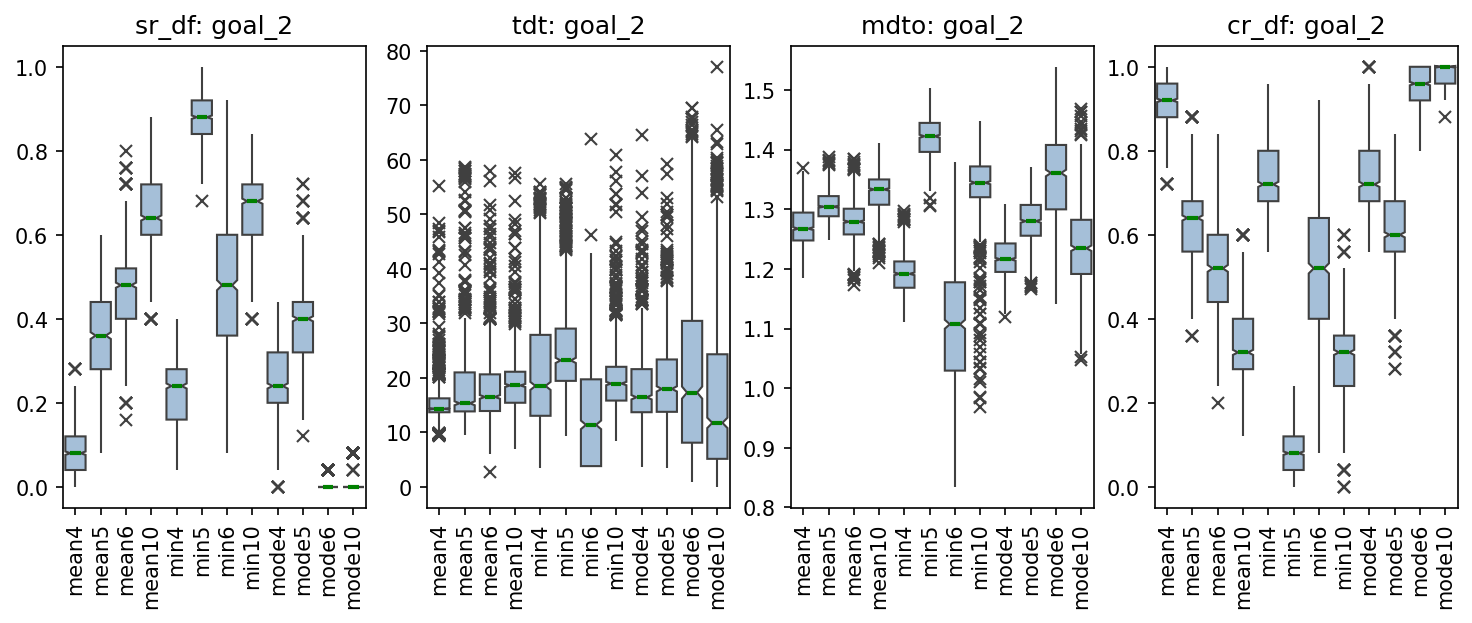

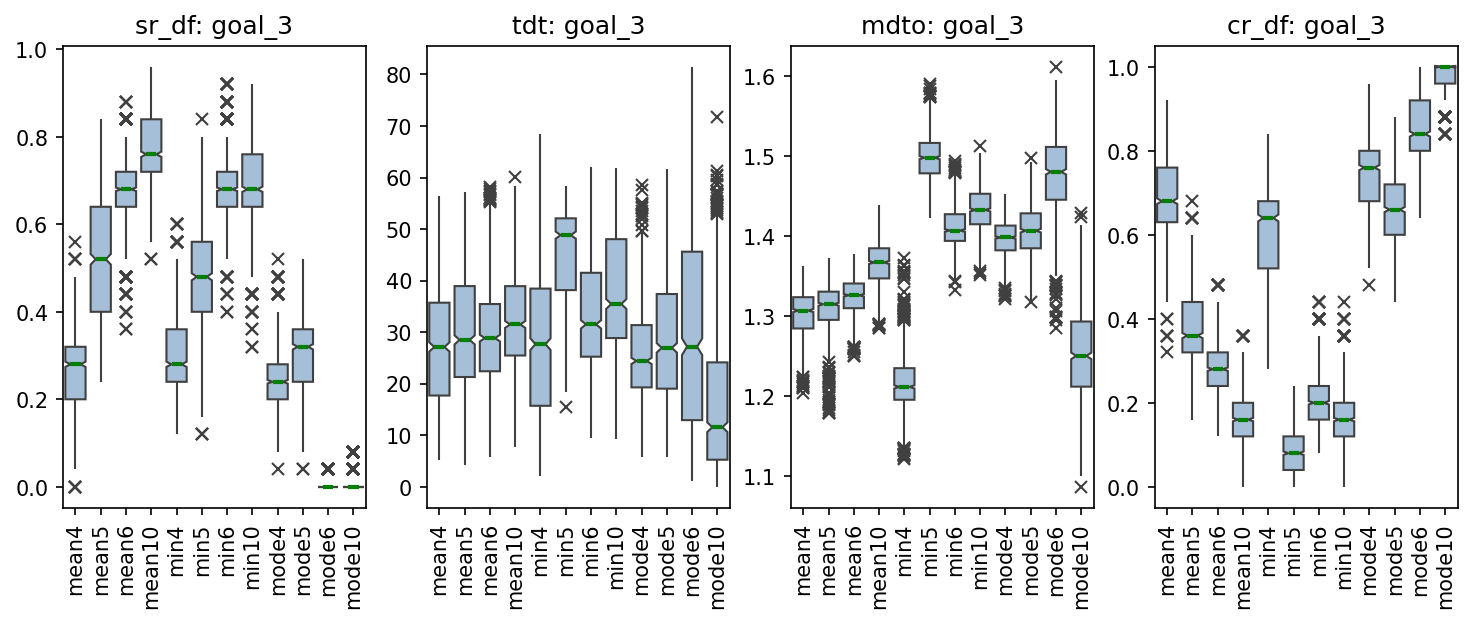

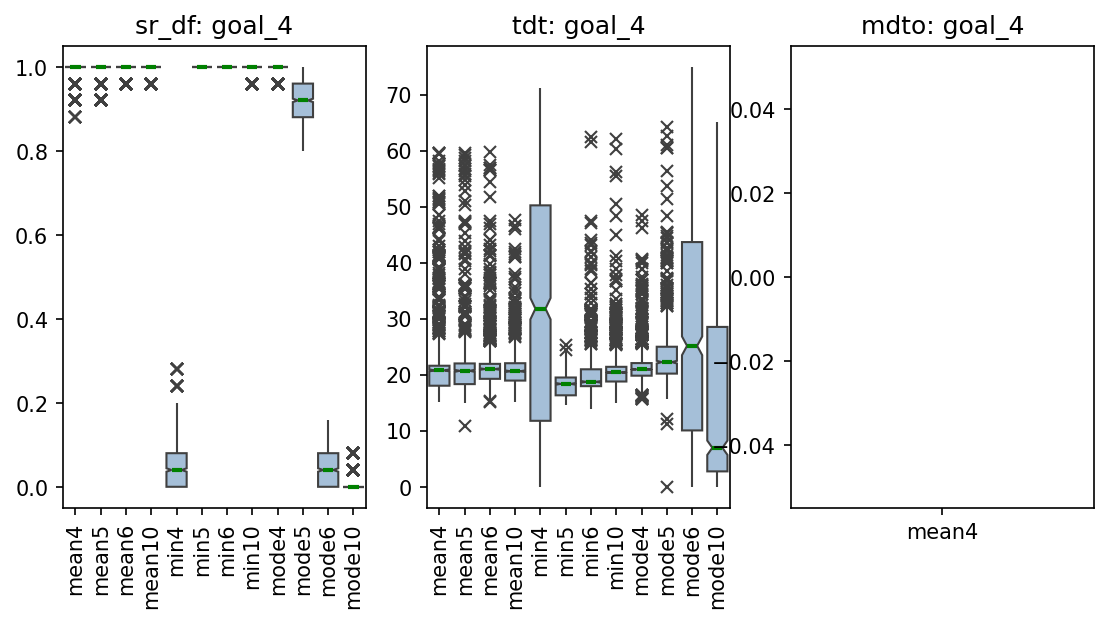

In [9]:
goal ='goal_0'

import seaborn as sns

df_sr_comp = pd.DataFrame()
df_cr_comp = pd.DataFrame()

for goal in [
    'goal_0'
    ,'goal_1'
    ,'goal_2'
    ,'goal_3'
    ,'goal_4'
  ]:

  plt.figure(figsize = (12,4), dpi =150)


  plt.subplot(141)
  df = pd.DataFrame({})
  for env_and_method in qn_test_metrics.keys():
    metric = 'sr_df'
    if env_and_method.startswith(goal):
      sampling = env_and_method.split('_')[1][1:]
      n_sectors = env_and_method.split('_')[2]
      df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values

  plt.title(metric+': '+goal)
  sns.boxplot(get_metric_df(qn_test_metrics, metric='sr_df').rolling(25,center=True).mean()
              ,notch=True, showcaps=False,
    flierprops={"marker": "x",'color':'r'},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "g", "linewidth": 2}
    )
  plt.xticks(rotation=90);
  df_sr_comp = pd.concat([df_sr_comp,df])



  plt.subplot(142)
  df = pd.DataFrame({})
  for env_and_method in qn_test_metrics.keys():
    metric = 'tdt'
    if env_and_method.startswith(goal):
      sampling = env_and_method.split('_')[1][1:]
      n_sectors = env_and_method.split('_')[2]
      df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric]

  plt.title(metric+': '+goal)
  sns.boxplot(get_metric_df(qn_test_metrics, metric='tdt')
    ,notch=True, showcaps=False,
      flierprops={"marker": "x",'color':'r'},
      boxprops={"facecolor": (.3, .5, .7, .5)},
      medianprops={"color": "g", "linewidth": 2}
  );
  plt.xticks(rotation=90);

  plt.subplot(143)
  df = pd.DataFrame({})
  for env_and_method in qn_test_metrics.keys():
    metric = 'mdto'
    if env_and_method.startswith(goal):
      sampling = env_and_method.split('_')[1][1:]
      n_sectors = env_and_method.split('_')[2]
      df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric]

  plt.title(metric+': '+goal)
  sns.boxplot(df.rolling(25,center=True).mean()
      ,notch=True, showcaps=False,
      flierprops={"marker": "x",'color':'r'},
      boxprops={"facecolor": (.3, .5, .7, .5)},
      medianprops={"color": "g", "linewidth": 2}
  );
  plt.xticks(rotation=90);

  plt.subplot(144)
  df1 = pd.DataFrame({})
  for env_and_method in qn_test_metrics.keys():
    metric = 'cr_df'
    if env_and_method.startswith(goal):
      sampling = env_and_method.split('_')[1][1:]
      n_sectors = env_and_method.split('_')[2]
      df1[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values

  plt.title(metric+': '+goal)
  sns.boxplot(df1.rolling(25,center=True).mean()
  ,notch=True, showcaps=False,
      flierprops={"marker": "x",'color':'r'},
      boxprops={"facecolor": (.3, .5, .7, .5)},
      medianprops={"color": "g", "linewidth": 2}
  );
  plt.xticks(rotation=90);
df_cr_comp = pd.concat([df_cr_comp,df1])

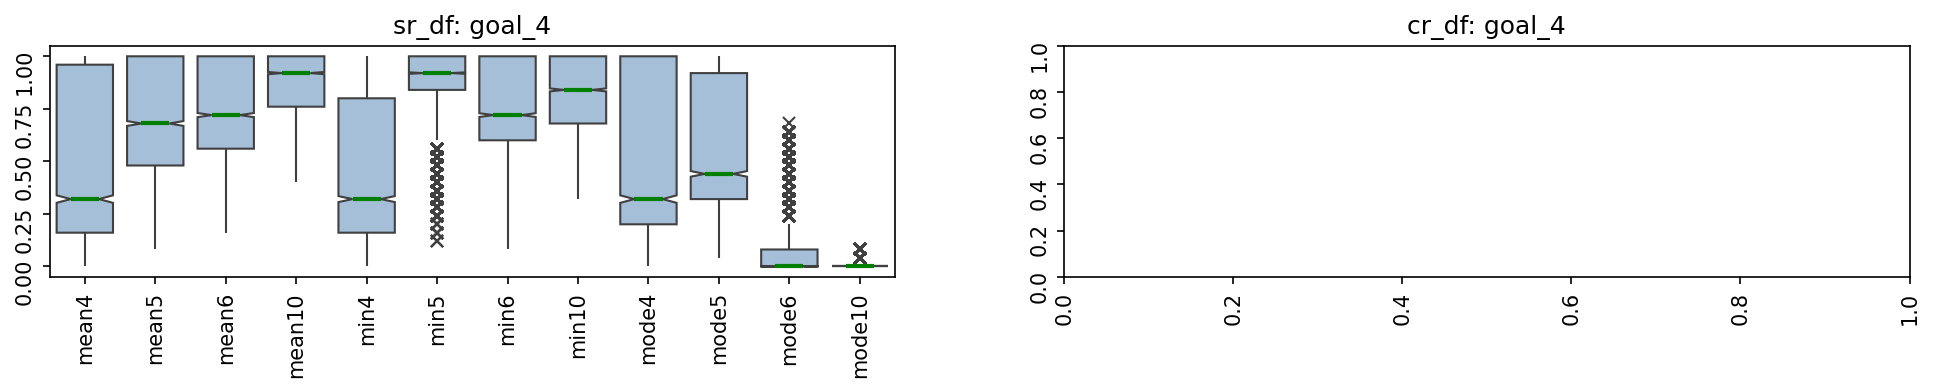

In [ ]:

import seaborn as sns

plt.figure(figsize = (16,2), dpi =150)
plt.subplot(121)
df = pd.DataFrame({})
for env_and_method in qn_test_metrics.keys():
  metric = 'sr_df'
  if env_and_method.startswith(goal):
    sampling = env_and_method.split('_')[1][1:]
    n_sectors = env_and_method.split('_')[2]
    df[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values

plt.title(metric+': '+goal)
#sns.violinplot(df);
sns.boxplot(df_sr_comp.rolling(25,center=True).mean()
            ,notch=True, showcaps=False,
  flierprops={"marker": "x",'color':'r'},
  boxprops={"facecolor": (.3, .5, .7, .5)},
  medianprops={"color": "g", "linewidth": 2}
  )
plt.xticks(rotation=90);
plt.yticks(rotation=90);

plt.subplot(122)

for env_and_method in qn_test_metrics.keys():
  metric = 'cr_df'
  if env_and_method.startswith(goal):
    sampling = env_and_method.split('_')[1][1:]
    n_sectors = env_and_method.split('_')[2]
    #df1[sampling+n_sectors+'_'+goal.split('_')[1]]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values
    #df1['env'] = int(goal.split('_')[1])
    df1[sampling+n_sectors]  = qn_test_metrics[env_and_method][metric].iloc[:,1].values

plt.title(metric+': '+goal)
#sns.violinplot(df1);
sns.boxplot(df_cr_comp.rolling(25,center=True).mean()
            ,notch=True, showcaps=False,
  flierprops={"marker": "x",'color':'r'},
  boxprops={"facecolor": (.3, .5, .7, .5)},
  medianprops={"color": "g", "linewidth": 2}
  )
plt.xticks(rotation=90);
plt.yticks(rotation=90);
plt.show()
#display(df.describe())

In [ ]:
qn_test_metrics = {}

for env_and_method in dict_testresult_per_dsrm.keys():

  qn_test_metrics[env_and_method] = {
      'tdt'  : calc_vec_tdt(dict_testresult_per_dsrm,env_and_method),
      'fdtg' : calc_vec_fdtg(dict_testresult_per_dsrm,env_and_method),
      'mdto' : calc_vec_mdto(dict_testresult_per_dsrm,env_and_method),
      'sr_df': get_success_df(dict_testresult_per_dsrm,env_and_method),
      'cr_df': get_collision_df(dict_testresult_per_dsrm,env_and_method)
  }

with open(save_path+'qn_test1000_metrics.pickle', 'wb') as handle:
    pickle.dump(qn_test_metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)